In [ ]:
pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.0
    Uninstalling te

In [ ]:
%env TF_ENABLE_ONEDNN_OPTS=0
import tensorflow as tf

env: TF_ENABLE_ONEDNN_OPTS=0


In [ ]:
import os
import time
import shutil
import pathlib
import itertools

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('../content/drive/MyDrive/computer vision/gaussian_filtered_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('../content/drive/MyDrive/computer vision/gaussian_filtered_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')


Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(valid_data)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)




29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 7169349 (27.35 MB)
Trainable params: 131845 (515.02 KB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________


In [ ]:
history=model.fit(train_data,steps_per_epoch=40, epochs=10, validation_data=valid_data, callbacks=[early_stopping])

Epoch 1/10
40/40 [==============================] - 527s 13s/step - loss: 1.0036 - accuracy: 0.6425 - val_loss: 0.8397 - val_accuracy: 0.6895
Epoch 2/10
40/40 [==============================] - 398s 10s/step - loss: 0.8101 - accuracy: 0.7156 - val_loss: 0.8318 - val_accuracy: 0.7223
Epoch 3/10
40/40 [==============================] - 400s 10s/step - loss: 0.7517 - accuracy: 0.7258 - val_loss: 0.7472 - val_accuracy: 0.7401
Epoch 4/10
40/40 [==============================] - 395s 10s/step - loss: 0.7320 - accuracy: 0.7364 - val_loss: 0.6977 - val_accuracy: 0.7715
Epoch 5/10
40/40 [==============================] - 458s 12s/step - loss: 0.7223 - accuracy: 0.7238 - val_loss: 0.6972 - val_accuracy: 0.7538
Epoch 6/10
40/40 [==============================] - 462s 12s/step - loss: 0.7141 - accuracy: 0.7250 - val_loss: 0.7762 - val_accuracy: 0.6881
Epoch 7/10
40/40 [==============================] - 454s 11s/step - loss: 0.7276 - accuracy: 0.7273 - val_loss: 0.6575 - val_accuracy: 0.7524
Epoch 

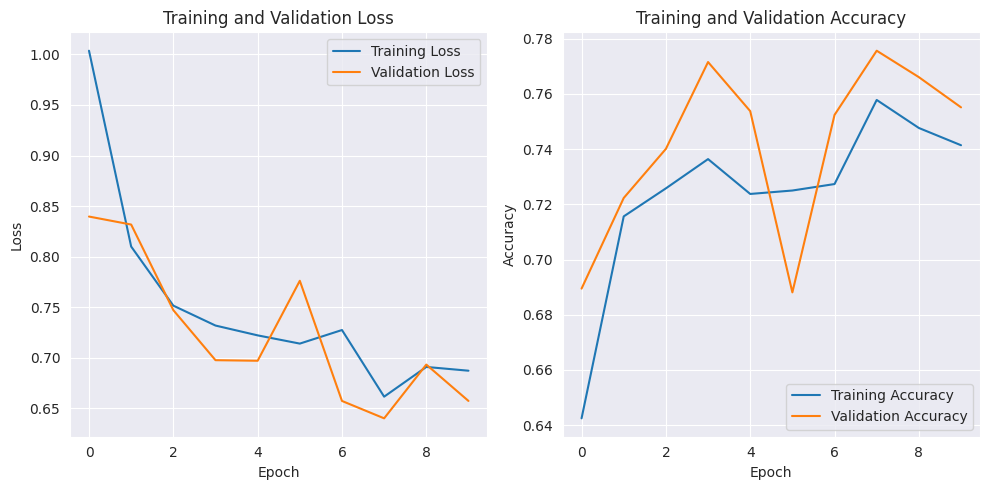

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_data = datagen.flow_from_directory('../content/drive/MyDrive/computer vision/gaussian_filtered_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 731 images belonging to 5 classes.


In [ ]:
evaluation_result=model.evaluate(test_data,verbose=1)
print("Test loss: ",evaluation_result[0])
print("Test Accuracy: ",evaluation_result[1])

23/23 [==============================] - 145s 6s/step - loss: 0.6523 - accuracy: 0.7674
Test loss:  0.652272641658783
Test Accuracy:  0.7674418687820435


In [ ]:
model.save('gaussian_densenet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
